In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

/Users/analeegraig/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/analeegraig/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('train_housingprices.csv')

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
len(df.columns)

81

In [5]:
df.index

RangeIndex(start=0, stop=1460, step=1)

In [6]:
df.drop('Id',axis=1,inplace=True)

In [7]:
df['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

/Users/analeegraig/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


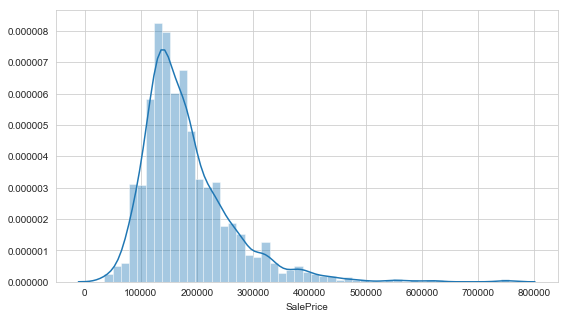

In [8]:
plt.figure(figsize=(9, 5))
sns.distplot(df['SalePrice'])

# slightly rightskewed which sort of makes sense since most people can't afford a super expensive home
# check for outliers in sale price later

In [9]:
df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

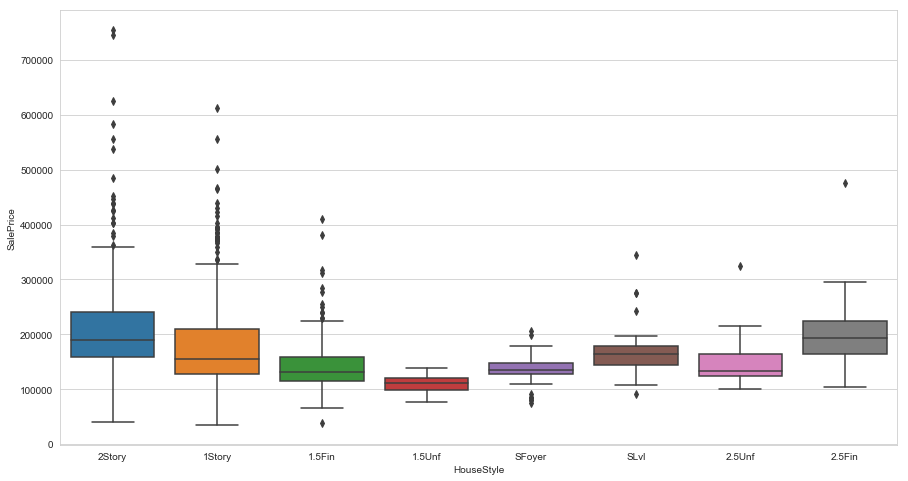

In [10]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='HouseStyle',y='SalePrice',data=df)

# okay, again we see some indication that there could be outliers2
# also, i have literally no idea what some of these terms mean
    # ... 1.5Unf??

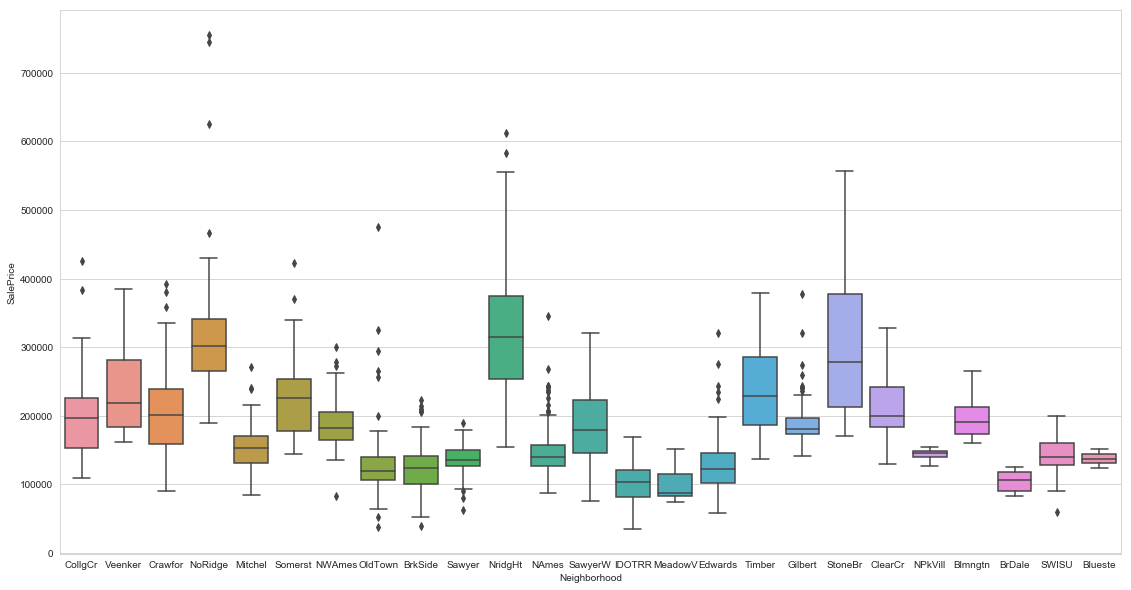

In [11]:
plt.figure(figsize=(19,10))
sns.boxplot(x='Neighborhood',y='SalePrice',data=df)

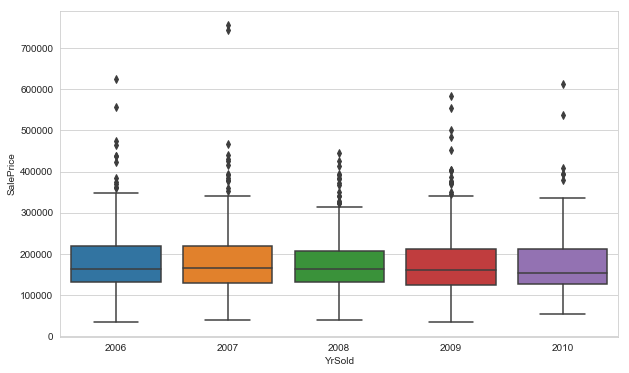

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='YrSold',y='SalePrice',data=df)

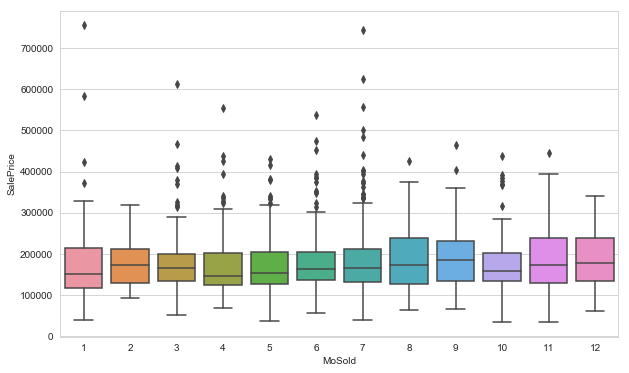

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MoSold',y='SalePrice',data=df)

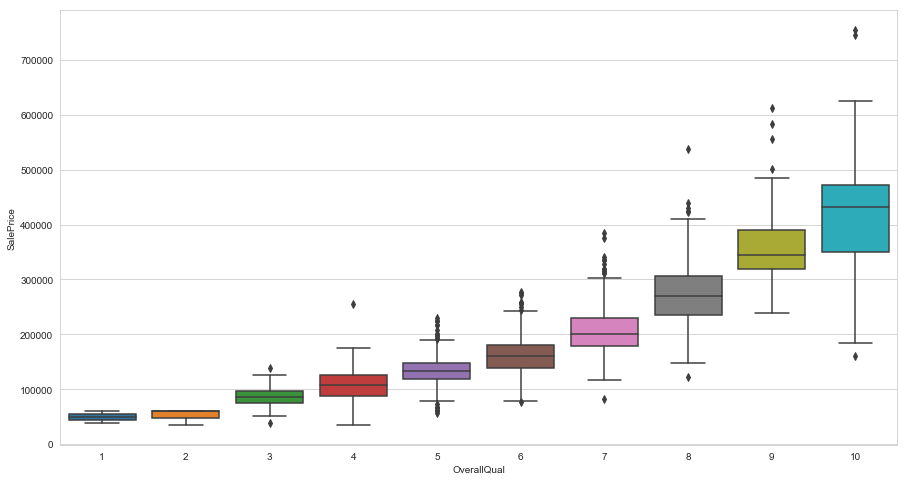

In [14]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='OverallQual',y='SalePrice',data=df)

# not shocking, quality seems correlated with saleprice ie higher quality means higher sale price

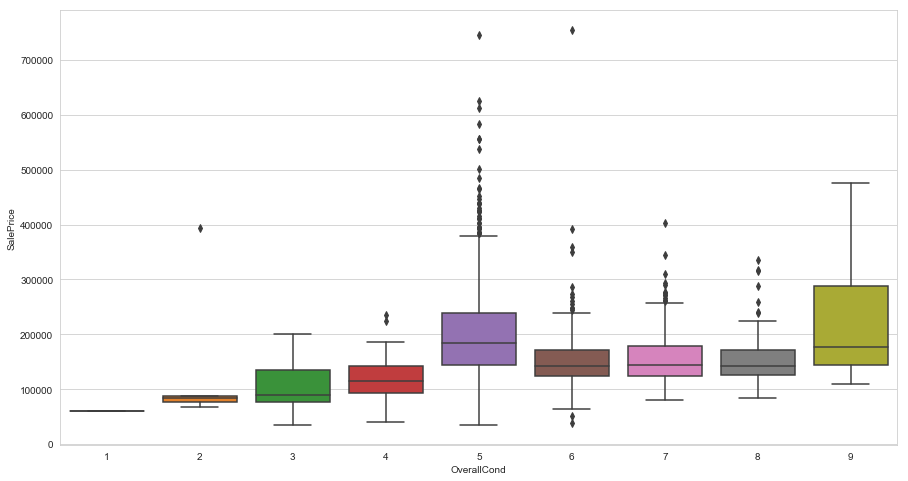

In [15]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='OverallCond',y='SalePrice',data=df)

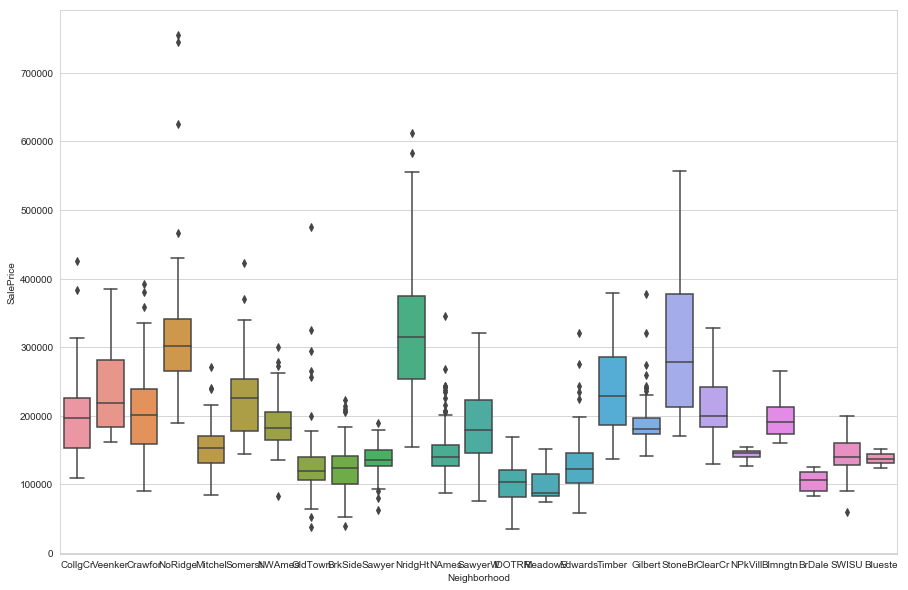

In [16]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Neighborhood',y='SalePrice',data=df)

# this is gonna be annoying

In [17]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [18]:
df['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

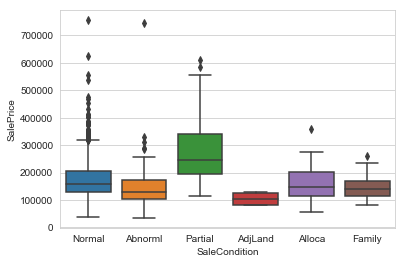

In [19]:
sns.boxplot(x='SaleCondition',y='SalePrice',data=df)

# Sale Condition (Nominal): Condition of sale

#      Normal	Normal Sale
#      Abnorml	Abnormal Sale -  trade, foreclosure, short sale
#      AdjLand	Adjoining Land Purchase
#      Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
#      Family	Sale between family members
#      Partial	Home was not completed when last assessed (associated with New Homes)

# https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt

# concern that 'family sales' are not an accurate reflection of housing prices

In [20]:
df[df['SaleCondition']=='Family']['SalePrice']

137     171000
154     125000
217     107000
251     235000
299     158500
454     188000
628     135000
632      82500
655      88000
734     108000
804     118000
822     225000
858     152000
886     145000
1102    135000
1127    259000
1145    149000
1242    170000
1387    136000
1404    105000
Name: SalePrice, dtype: int64

In [21]:
df[(df['SalePrice']==171000) & (df['SaleCondition']=='Family')]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
137,90,RL,82.0,11070,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Family,171000


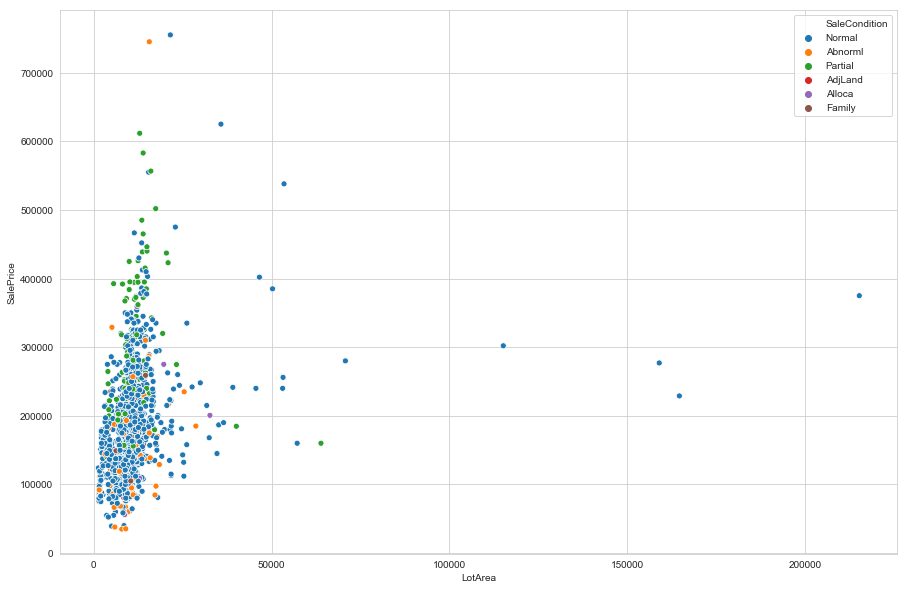

In [22]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='LotArea',y='SalePrice',data=df,hue='SaleCondition',)

# okay, so, just off the bat we have some candidates for possible outliers

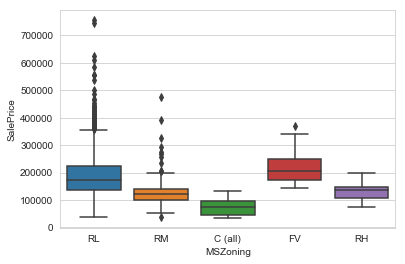

In [23]:
sns.boxplot(x='MSZoning',y='SalePrice',data=df)

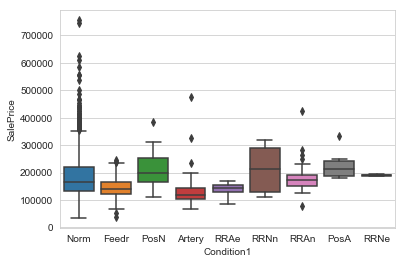

In [24]:
sns.boxplot(x='Condition1',y='SalePrice',data=df)

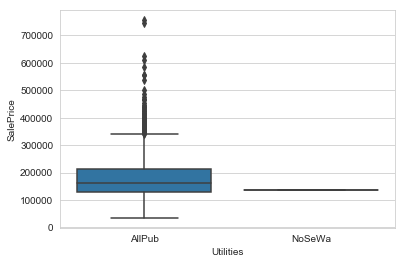

In [25]:
sns.boxplot(x='Utilities',y='SalePrice',data=df)

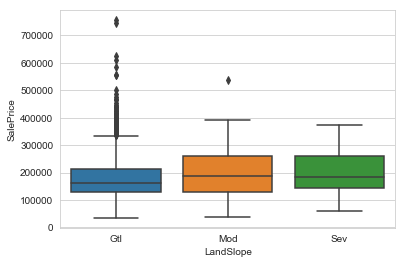

In [26]:
sns.boxplot(x='LandSlope',y='SalePrice',data=df)

# interesting - overall median is slightly higher for sloped homes. this is most likely because as we have already seen
    # homes on a hill have higher sale prices

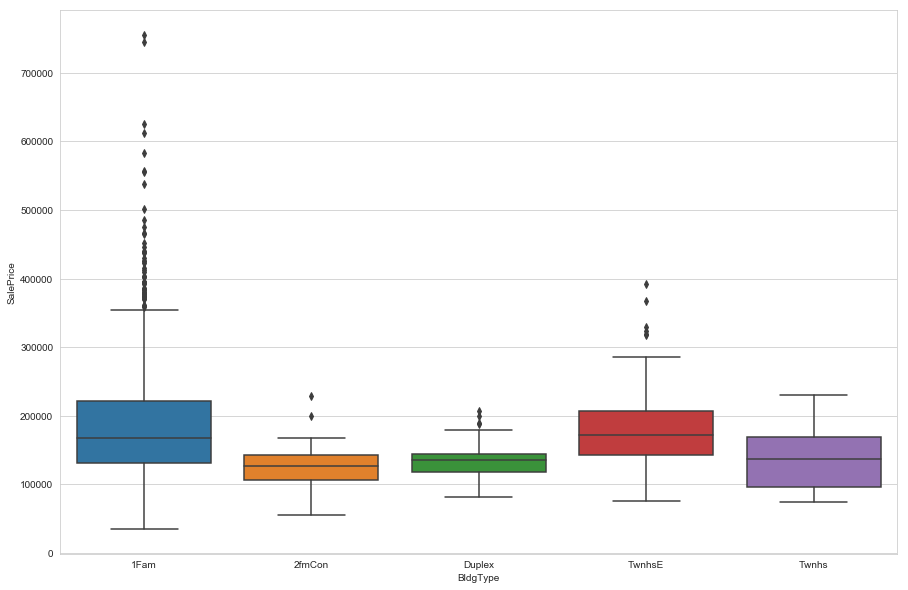

In [27]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='BldgType',y='SalePrice',data=df)

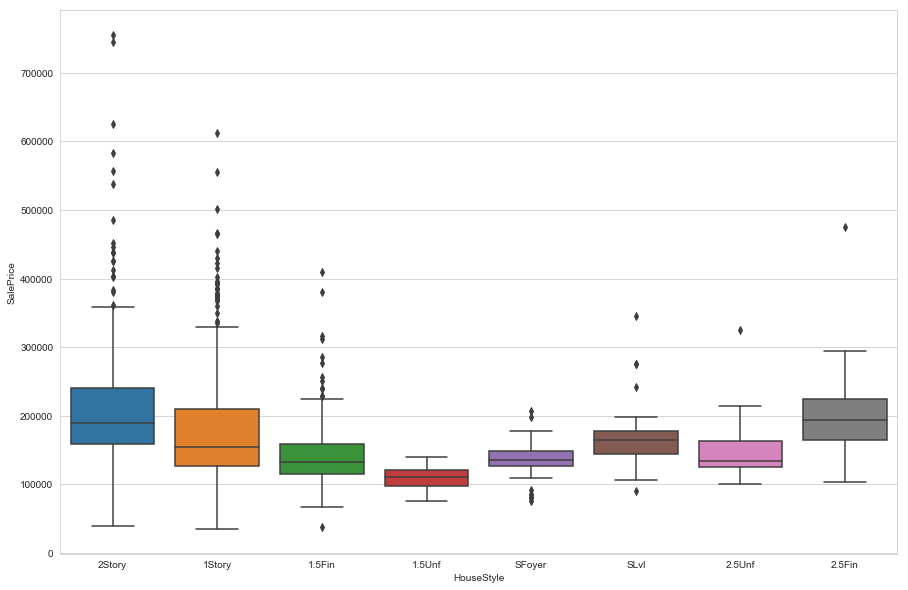

In [28]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='HouseStyle',y='SalePrice',data=df)

In [29]:
# find missing values

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
df.dropna(axis=1).head()

# 19 columns have missing values. but which ones?

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Finding missing values

In [31]:
# find columns with missing values
df.columns[df.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [32]:
# tricky ... it's unclear whether or not 'missing values' in some of these columns is because homes don't have the
    # facilities that these columns describe .. ie doesn't have a basement or garage
    
    
# Recall first step to dealing with missing values is determining whether the missing data is ignorable or not
    # (ie respondent didn't answer questions about basement quality b/c they don't have a basement)


## Electrical

In [33]:
df[df['Electrical'].isna()]

# 1 missing value in electrical
# ... good candidate for dropping lol or just filling with SBrkr

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [34]:
# fill null

df['Electrical'].fillna('SBrkr',inplace=True)

In [35]:
df['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

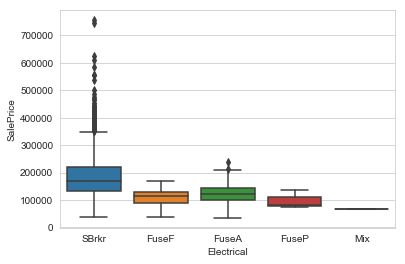

In [36]:
sns.boxplot(x='Electrical',y='SalePrice',data=df)

## Frontage: refers to the width of the lot at the front (ie facing the front door of home for example)

In [37]:
df[df['LotFrontage'].isna()].head()

# so ... 259 instances

# it would make sense to fill these related to neighborhood and style of home / total square feet
    # could also be that this is related to apartments???

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000


In [38]:
df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [39]:
df[df['Alley'].isna()].head()

# null values here most likely mean that there is no alley access (kinda know this from documentation)
# 1369 instances

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [41]:
df['Alley'].fillna('None',inplace=True)

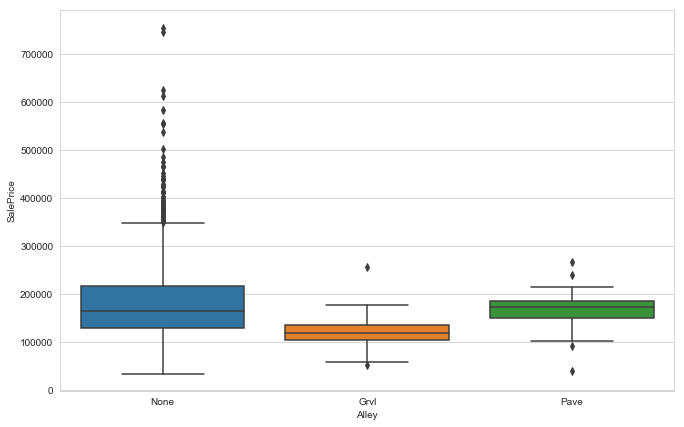

In [42]:
plt.figure(figsize=(11,7))
sns.boxplot(x='Alley',y='SalePrice',data=df)

# presence of alley and then type of alley does seem to have an affect

## Masonry veneer ... just refers to a house basically that has brick put on the outside ... but the brick has no structural
### quality .. its purely aesthetic
### this would seem like an instance where null values are examples of ignorable missing data

In [43]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [44]:
df[df['MasVnrType'].isna()]

# interesting tho ... why are there only 8 missing values?

# okay, so there actually is an option for "none" for masonry veneer and it's the most common
# so, it's possible that these values for just incorrectly filled in and should actually be 'none'

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,NaN,7851,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,20,RL,NaN,32668,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,60,FV,65.0,8125,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,20,RL,67.0,10083,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,20,FV,95.0,11639,Pave,None,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,20,RL,107.0,13891,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,60,RL,75.0,9473,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [45]:
df[df['MasVnrArea'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,NaN,7851,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,20,RL,NaN,32668,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,60,FV,65.0,8125,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,20,RL,67.0,10083,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,20,FV,95.0,11639,Pave,None,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,20,RL,107.0,13891,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,60,RL,75.0,9473,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


### investigate basement related columns

In [46]:
df['BsmtQual'].value_counts()

# okay so sort of strange descriptions
# 'bmstqual' refers to the height of the basement

#      Ex	Excellent (100+ inches)	
#      Gd	Good (90-99 inches)
#      TA	Typical (80-89 inches)
#      Fa	Fair (70-79 inches)
#      Po	Poor (<70 inches
#      NA	No Basement

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [47]:
df[df['BsmtQual'].isna()].head()

# 37 missing rows for basement quality

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,90,RL,72.0,10791,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,90,RL,65.0,6040,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,20,RL,60.0,7200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,90,RL,64.0,7018,Pave,None,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,20,RL,60.0,7200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500


In [48]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [49]:
# my guess is that null values for basement refer to homes without a basement (this is possible from the documentation)

In [50]:
df[df['BsmtCond'].isna()].head()

# 37 missing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,90,RL,72.0,10791,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,90,RL,65.0,6040,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,20,RL,60.0,7200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,90,RL,64.0,7018,Pave,None,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,20,RL,60.0,7200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500


In [51]:
df[df['BsmtExposure'].isna()].head()

# interesting ... bmstexposure has one more missing value than previous two basement columns
# 38 missing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,90,RL,72.0,10791,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,90,RL,65.0,6040,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,20,RL,60.0,7200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,90,RL,64.0,7018,Pave,None,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,20,RL,60.0,7200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500


In [52]:
df[df['BsmtFinType1'].isna()].head()

# 37 missing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,90,RL,72.0,10791,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,90,RL,65.0,6040,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,20,RL,60.0,7200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,90,RL,64.0,7018,Pave,None,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,20,RL,60.0,7200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500


In [53]:
df[df['BsmtFinType2'].isna()].head()

# also has one more missing value ie 38 missing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,90,RL,72.0,10791,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,90,RL,65.0,6040,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,20,RL,60.0,7200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,90,RL,64.0,7018,Pave,None,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,20,RL,60.0,7200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500


## fireplaces

In [54]:
df[df['FireplaceQu'].isna()].head()

# 690 instances

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
5,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
10,20,RL,70.0,11200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
12,20,RL,NaN,12968,Pave,None,IR2,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
15,45,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Corner,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000


In [55]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [56]:
# missing values for fireplace quality most likely refer to homes where that doesn't apply - ie no fireplace

In [57]:
df['Fireplaces'].value_counts()

# yeah, probably above is correct b/c homes with 0 fireplaces = 690 which is same as number of homes w/ na for fireplace q

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

## garages
    ## one way to look for nulls is to look at the home type (ie townhouses probably won't have driveways)

In [58]:
df[df['GarageType'].isna()].head()

# 81 instances

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,90,RL,65.0,6040,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,190,RM,33.0,4456,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,90,RL,72.0,10778,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,50,C (all),105.0,8470,Pave,None,IR1,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,20,RL,60.0,8070,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600


In [59]:
df['GarageType'].value_counts()

# ... missing NA ... it's possible that the nulls just mean they don't have garages

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [60]:
df['GarageType'].fillna('None',inplace=True)

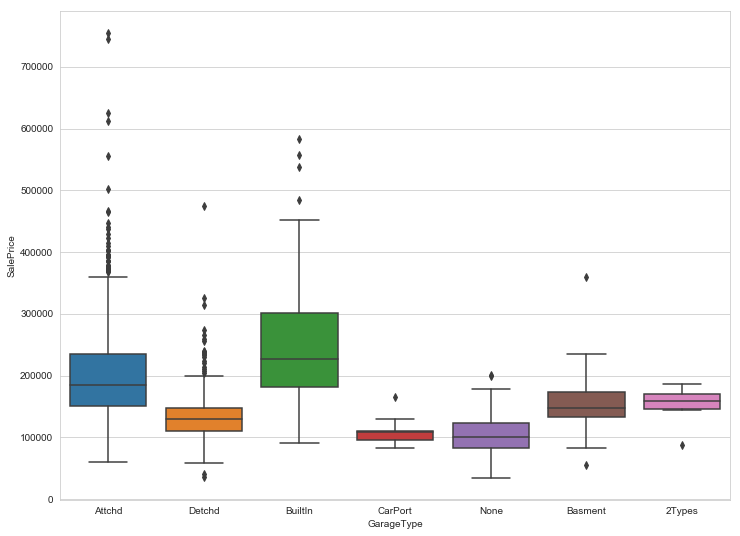

In [61]:
plt.figure(figsize=(12,9))
sns.boxplot(x='GarageType',y='SalePrice',data=df)

In [62]:
df['GarageType'].value_counts()

# so yeah, nan values most likely mean that it doesn't have a garage

Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [63]:
df[df['GarageYrBlt'].isna()].head()

# 81 instances -- same as above

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,90,RL,65.0,6040,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,190,RM,33.0,4456,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,90,RL,72.0,10778,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,50,C (all),105.0,8470,Pave,None,IR1,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,20,RL,60.0,8070,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600


In [64]:
df[df['GarageFinish'].isna()].head()

# 81 instances

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,90,RL,65.0,6040,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,190,RM,33.0,4456,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,90,RL,72.0,10778,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,50,C (all),105.0,8470,Pave,None,IR1,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,20,RL,60.0,8070,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600


In [65]:
df[df['GarageQual'].isna()].head()

# 81 instances

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,90,RL,65.0,6040,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,190,RM,33.0,4456,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,90,RL,72.0,10778,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,50,C (all),105.0,8470,Pave,None,IR1,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,20,RL,60.0,8070,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600


In [66]:
df[df['GarageCond'].isna()].head()

# 81

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,90,RL,65.0,6040,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,190,RM,33.0,4456,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,90,RL,72.0,10778,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,50,C (all),105.0,8470,Pave,None,IR1,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,20,RL,60.0,8070,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600


## PoolQc

In [67]:
df[df['PoolQC'].isna()].head()

# 1453 instances

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [68]:
# cross reference above with pool area

df[df['PoolArea']==0].head()

# yeah, 1453 values where pool area = 0, same as above where poolqc null = 1453, ie suggest they are all instances w/ no pool
# could be a good idea to do some feature engineering

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
df[df['PoolArea']!=0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,75,RL,174.0,25419,Pave,None,Reg,Lvl,AllPub,Corner,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,20,RL,78.0,10140,Pave,None,Reg,Lvl,AllPub,Inside,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,80,RL,76.0,9880,Pave,None,Reg,Lvl,AllPub,Inside,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,60,RL,160.0,15623,Pave,None,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,60,RL,80.0,16692,Pave,None,IR1,Lvl,AllPub,Inside,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,80,RL,NaN,19690,Pave,None,IR1,Lvl,AllPub,CulDSac,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [70]:
df['PoolQC'].value_counts()

# should do some ranking of values. obviously excellent should not be next to fair

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

## Fence

In [71]:

df[df['Fence'].isna()].head()

# 1179 nulls

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [72]:
# check if there is another fence related quality to cross-reference

# there's not, so check documentation, yeah NA means no fence

In [73]:
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

## MiscFeature

In [74]:
df[df['MiscFeature'].isna()].head()

# 1406 instances

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [75]:
df['MiscFeature'].value_counts()

# should do something with 2nd garage...

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [76]:
# miscval

df[df['MiscVal']!=0].head()

# 52 instances. Means that 1408 homes have no misc features
# something odd is happening ... possible that there are misc features that have 0 value

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
16,20,RL,NaN,11241,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
17,90,RL,72.0,10791,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
51,50,RM,52.0,6240,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500


In [77]:
df[(df['MiscVal']==0) & (df['MiscFeature'].isna()==False)]

# so yeah, two homes have misc features where miscvalue = 0
# the features in question are "other" and "shed"
# put a pin in this

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
873,40,RL,60.0,12144,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Othr,0,9,2009,WD,Normal,133000
1200,20,RL,71.0,9353,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Shed,0,7,2006,Oth,Abnorml,116050


# Filling in nulls and altering ordinal variables:

In [78]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Ordinal variables that need to be changed:
### Don't have nulls:
    Lot shape, utilities, land slope, overall qual, overall cond, exter qual,
    exter cond, heatingqc, kitchen qual, functional, pavedrive
    
### have nulls:
    bsmt qual, bsmt cond, bsmt exposure, bsmtfintype1, bsmtfintype2, electrical,
    garagefinish, garagequal, garagecond, fence, poolqc, fireplacequ

### for now i will treat ordinal values as continuous...

### first deal with columns without nulls:

## LotShape

In [79]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [80]:
lotshape_dict = {'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1}

In [81]:
df['LotShape'] = df['LotShape'].map(lotshape_dict)

In [82]:
df['LotShape'].value_counts()

4    925
3    484
2     41
1     10
Name: LotShape, dtype: int64

# REVISIT BELOW!

## Utilities

In [83]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [84]:
## pin in above

## LandSlope

In [85]:
df['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [86]:
landslope_dict = {'Gtl':3, 'Mod':2, 'Sev':1}

In [87]:
df['LandSlope'] = df['LandSlope'].map(landslope_dict)

In [88]:
df['LandSlope'].value_counts()

3    1382
2      65
1      13
Name: LandSlope, dtype: int64

## Quality variables (general)

In [89]:
df['OverallQual'].value_counts()

# already in proper form
    # could use argument that since overall quality is labeled this way,
        # we can use the continuous model for other ordinal values..

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [90]:
df['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [91]:
qualities_dict = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}

## bit concerning that there is no value for 'poor' even tho it's in documentation....

In [92]:
df['ExterQual'] = df['ExterQual'].map(qualities_dict)

In [93]:
df['ExterQual'].value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [94]:
df['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [95]:
df['ExterCond'] = df['ExterCond'].map(qualities_dict)

In [96]:
df['ExterCond'].value_counts()

3    1282
4     146
2      28
5       3
1       1
Name: ExterCond, dtype: int64

## HeatingQC

In [97]:
df['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [98]:
df['HeatingQC'] = df['HeatingQC'].map(qualities_dict)

In [99]:
df['HeatingQC'].value_counts()

5    741
3    428
4    241
2     49
1      1
Name: HeatingQC, dtype: int64

# KitchenQual

In [100]:
df['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [101]:
df['KitchenQual'] = df['KitchenQual'].map(qualities_dict)

In [102]:
df['KitchenQual'].value_counts()

3    735
4    586
5    100
2     39
Name: KitchenQual, dtype: int64

## Functional

In [103]:
df['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [104]:
functional_dict = {'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}

In [105]:
df['Functional'] = df['Functional'].map(functional_dict)

In [106]:
df['Functional'].value_counts()

8    1360
6      34
7      31
5      15
4      14
3       5
2       1
Name: Functional, dtype: int64

## PavedDrive

In [107]:
df['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [108]:
paveddrive_dict = {'Y':3, 'P':2, 'N':1}

In [109]:
df['PavedDrive'] = df['PavedDrive'].map(paveddrive_dict)

## Electrical

In [110]:
df['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [111]:
df['Electrical'] = df['Electrical'].map({'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})

In [112]:
# ask about consistency among oridinal variables. i have defaulted 0 for those that don't have that feature
    # (ie if you don't have a garage- garage exposure = 0 .... should i keep this even tho electrical
    # has no home with ~none?)

## dealing with ordinal values with nulls!

## PoolQC

In [113]:
df['PoolQC'].fillna('None', inplace=True)

In [114]:
df['PoolQC'].value_counts()

None    1453
Gd         3
Fa         2
Ex         2
Name: PoolQC, dtype: int64

In [115]:
df['PoolQC'] = df['PoolQC'].map(qualities_dict)

In [116]:
df['PoolQC'].value_counts()

0    1453
4       3
5       2
2       2
Name: PoolQC, dtype: int64

In [117]:
df[df['PoolQC'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


## Masonry

In [118]:
# masonry ... just fill in most common value which is none ..

In [119]:
df['MasVnrType'].fillna('None',inplace=True)

In [120]:
df['MasVnrArea'].fillna(0,inplace=True)

## Fence

In [121]:
df['Fence'].fillna('None',inplace=True)

In [122]:
# make ordinal

df['Fence'] = df['Fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'None':0})

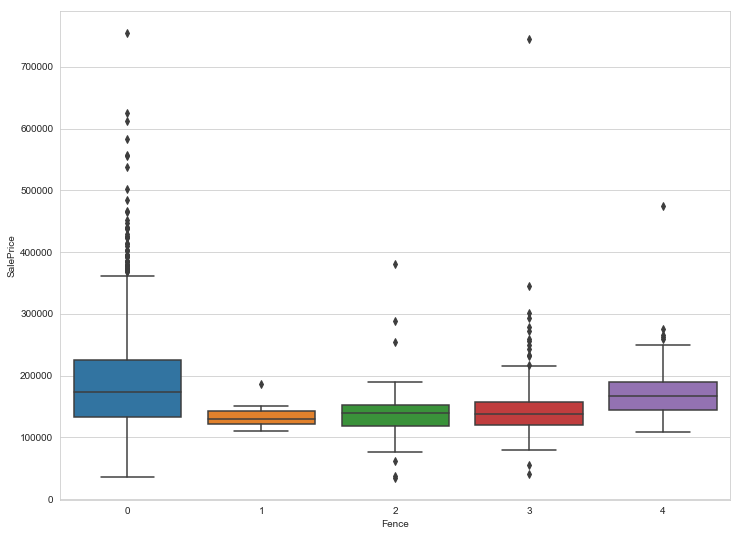

In [123]:
plt.figure(figsize=(12,9))
sns.boxplot(x='Fence',y='SalePrice',data=df)

# yeah ... not convinced that this should be an ordinal variable

# kind of weird. ordinal if you do have a fence ... but it seems like homes without fences
    # actually have higher sale prices ... sooooo something is not right

## MiscFeature

In [124]:
df['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [125]:
df['MiscFeature'].fillna('None',inplace=True)

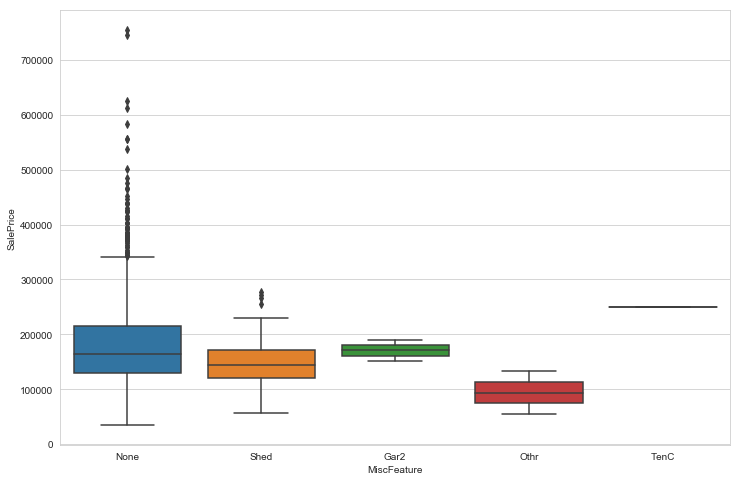

In [126]:
# see if misc feature is at all relevent
plt.figure(figsize=(12,8))
sns.boxplot(x='MiscFeature',y='SalePrice',data=df)

# seems irrelevent honestly

## Basement columns (fill null and make ordinal)

In [127]:
df[(df['BsmtQual'].isna()) & (df['BsmtCond'].isna()) & (df['BsmtExposure'].isna()) & (df['BsmtFinType1'].isna()) & (df['BsmtFinType2'].isna())].head()

# ... all the same rows --> 37 so not worried about inconsistencies. there are all homeswithout a basement

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,90,RL,72.0,10791,Pave,None,4,Lvl,AllPub,Inside,...,0,0,0,Shed,500,10,2006,WD,Normal,90000
39,90,RL,65.0,6040,Pave,None,4,Lvl,AllPub,Inside,...,0,0,0,None,0,6,2008,WD,AdjLand,82000
90,20,RL,60.0,7200,Pave,None,4,Lvl,AllPub,Inside,...,0,0,0,None,0,7,2006,WD,Normal,109900
102,90,RL,64.0,7018,Pave,None,4,Bnk,AllPub,Inside,...,0,0,0,None,0,6,2009,WD,Alloca,118964
156,20,RL,60.0,7200,Pave,None,4,Lvl,AllPub,Inside,...,0,0,0,None,0,6,2006,WD,Normal,109500


In [128]:
df[(df['BsmtFinType1'].isna()==False) & (df['BsmtFinType2'].isna())]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,20,RL,85.0,10655,Pave,None,3,Lvl,AllPub,Inside,...,0,0,0,None,0,10,2009,WD,Normal,284000


In [129]:
df[['BsmtFinType1','BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond']].iloc[948]

BsmtFinType1    Unf
BsmtExposure    NaN
BsmtFinType2    Unf
BsmtQual         Gd
BsmtCond         TA
Name: 948, dtype: object

In [130]:
df[['BsmtFinType1','BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond']].iloc[332]

BsmtFinType1    GLQ
BsmtExposure     No
BsmtFinType2    NaN
BsmtQual         Gd
BsmtCond         TA
Name: 332, dtype: object

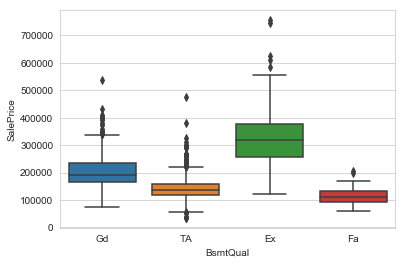

In [131]:
sns.boxplot(x='BsmtQual',y='SalePrice',data=df)

In [132]:
# just gonna assume that nulls for basement are nulls b/c no basement exists

In [133]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [134]:
df.fillna({'BsmtQual':'None', 'BsmtCond':'None', 'BsmtExposure':'None', 'BsmtFinType1':'None', 'BsmtFinType2':'None'}, inplace=True)

In [135]:
df[df['BsmtQual'].isna()]

# worked

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [136]:
df['BsmtQual'].value_counts()

TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64

In [137]:
for column in df[['BsmtQual','BsmtCond']]:
    df[column] = df[column].map(qualities_dict)

In [138]:
bsmtexposure_dict = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'None':0}

In [139]:
df['BsmtExposure'] = df['BsmtExposure'].map(bsmtexposure_dict)

In [140]:
basement_fintype_dict = {'GLQ':6 ,'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0}

In [141]:
for column in df[['BsmtFinType1', 'BsmtFinType2']]:
    df[column] = df[column].map(basement_fintype_dict)

In [142]:
df['BsmtQual'].value_counts()

3    649
4    618
5    121
0     37
2     35
Name: BsmtQual, dtype: int64

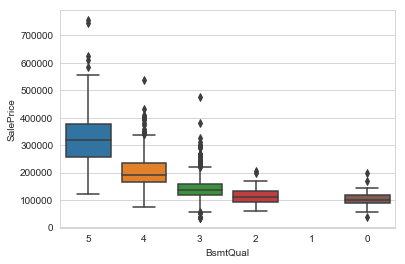

In [143]:
sns.boxplot(x='BsmtQual',y='SalePrice',data=df,order=[5,4,3,2,1,0])

## deal with garages (fill nulls and make ordinal)

In [144]:
df.fillna({'GarageType':'None', 'GarageYrBuilt':'None', 'GarageFinish':'None', 'GarageQual':'None', 'GarageCond':'None', 'GarageYrBlt':'None'}, inplace=True)

In [145]:
df[df['GarageType'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


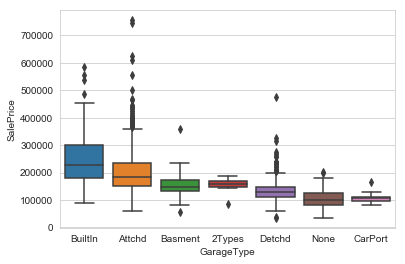

In [146]:
sns.boxplot(x='GarageType',y='SalePrice', data=df, order=['BuiltIn', 'Attchd', 'Basment', '2Types', 'Detchd', 'None', 'CarPort'])

In [147]:
df['GarageFinish'] = df['GarageFinish'].map({'Fin':3, 'RFn':2, 'Unf':1, 'None':0})

In [148]:
for column in df[['GarageQual','GarageCond']]:
    df[column] = df[column].map(qualities_dict)

## FireplaceQu

In [149]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [150]:
# fill nulls for fireplace
df['FireplaceQu'].fillna('None',inplace=True)

In [151]:
df['FireplaceQu'] = df['FireplaceQu'].map(qualities_dict)

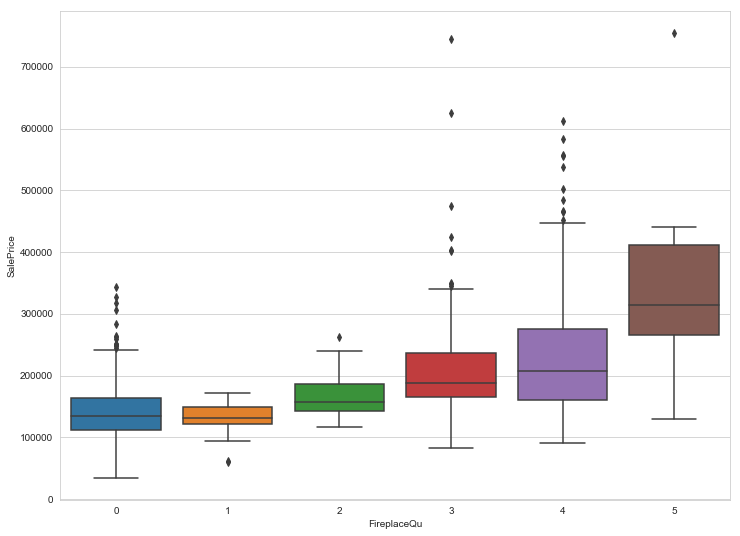

In [152]:
plt.figure(figsize=(12,9))
sns.boxplot(x='FireplaceQu',y='SalePrice',data=df)

## LotFrontage

In [153]:
df.columns[df.isna().any()].tolist()

['LotFrontage']

In [154]:
corr = df.corr()

In [155]:
# plt.figure(figsize=(50, 40))
# sns.heatmap(corr, linewidths=1, annot=True)

# so, lot frontage most correlated with lotarea, totalbasment, 1stfloorsf, gr living room area, 

In [156]:
corr['LotFrontage']>0.4

# correlated with LotArea, 1stFlrSF, GrLivArea

MSSubClass       False
LotFrontage       True
LotArea           True
LotShape         False
LandSlope        False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
ExterQual        False
ExterCond        False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
HeatingQC        False
Electrical       False
1stFlrSF          True
2ndFlrSF         False
LowQualFinSF     False
GrLivArea         True
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu      False
GarageFinish     False
GarageCars       False
GarageArea       False
GarageQual       False
GarageCond       False
PavedDrive 

In [157]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

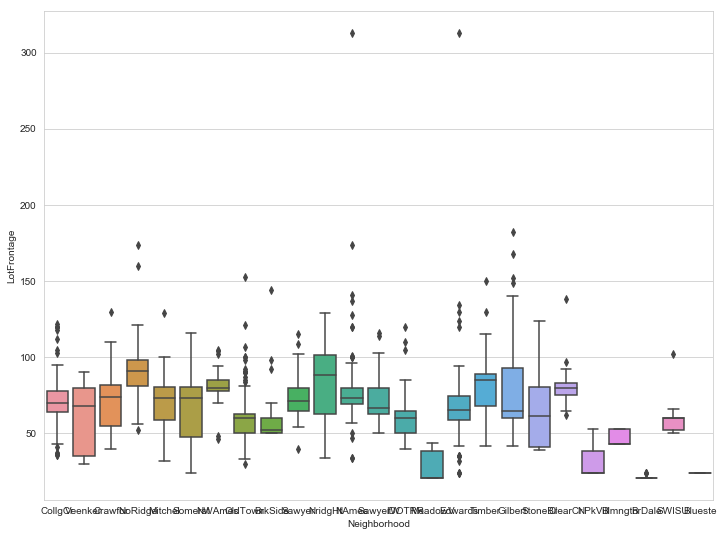

In [158]:
plt.figure(figsize=(12,9))
sns.boxplot(x='Neighborhood',y='LotFrontage',data=df)

In [159]:
# investigate possible reasons for missing lot frontage data

    # .. look at differences between lot frontage missing and not for values with which lot frontage is highly correlated

In [160]:
df[df['LotFrontage'].isna()].describe()

# smaller mean lot area

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice
count,259.000000,0.0,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,...,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,55.501931,NaN,13137.370656,3.204633,2.872587,5.992278,5.637066,1974.455598,1983.362934,107.413127,...,18.351351,4.725869,15.212355,2.849421,0.015444,0.602317,126.949807,6.227799,2007.876448,181620.073359
std,38.389818,NaN,16215.264451,0.591131,0.416684,1.197518,1.194114,21.388093,17.826672,159.264526,...,58.527176,31.736777,54.790911,45.857089,0.248548,1.232692,1102.676958,2.706266,1.317806,57841.775706
min,20.000000,NaN,1974.000000,1.000000,1.000000,1.000000,1.000000,1916.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,61000.000000
25%,20.000000,NaN,8065.500000,3.000000,3.000000,5.000000,5.000000,1962.000000,1969.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,143375.000000
50%,60.000000,NaN,10624.000000,3.000000,3.000000,6.000000,5.000000,1976.000000,1985.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,172400.000000
75%,70.000000,NaN,13018.500000,4.000000,3.000000,7.000000,6.000000,1993.500000,2000.000000,176.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,NaN,164660.000000,4.000000,3.000000,10.000000,9.000000,2009.000000,2010.000000,731.000000,...,318.000000,290.000000,396.000000,738.000000,4.000000,4.000000,15500.000000,12.000000,2010.000000,466500.000000


In [161]:
df[df['LotFrontage'].isna()==False].describe()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,...,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,57.198168,70.049958,9951.698585,3.675271,2.951707,6.122398,5.562032,1970.580350,1985.189842,102.190674,...,22.731057,3.125729,15.028310,2.739384,0.018318,0.557868,25.490425,6.342215,2007.802664,180770.480433
std,43.106427,24.284752,7924.353975,0.545707,0.233093,1.419216,1.094543,31.750335,21.196948,185.082183,...,61.659820,28.775134,55.986122,38.865124,0.273247,1.198690,189.782665,2.703755,1.330486,83389.519866
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1.000000,2.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7420.000000,3.000000,3.000000,5.000000,5.000000,1950.000000,1966.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,127500.000000
50%,50.000000,69.000000,9262.000000,4.000000,3.000000,6.000000,5.000000,1972.000000,1995.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,159500.000000
75%,70.000000,80.000000,11249.000000,4.000000,3.000000,7.000000,6.000000,2003.000000,2004.000000,160.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,4.000000,3.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,552.000000,508.000000,480.000000,648.000000,5.000000,4.000000,3500.000000,12.000000,2010.000000,755000.000000


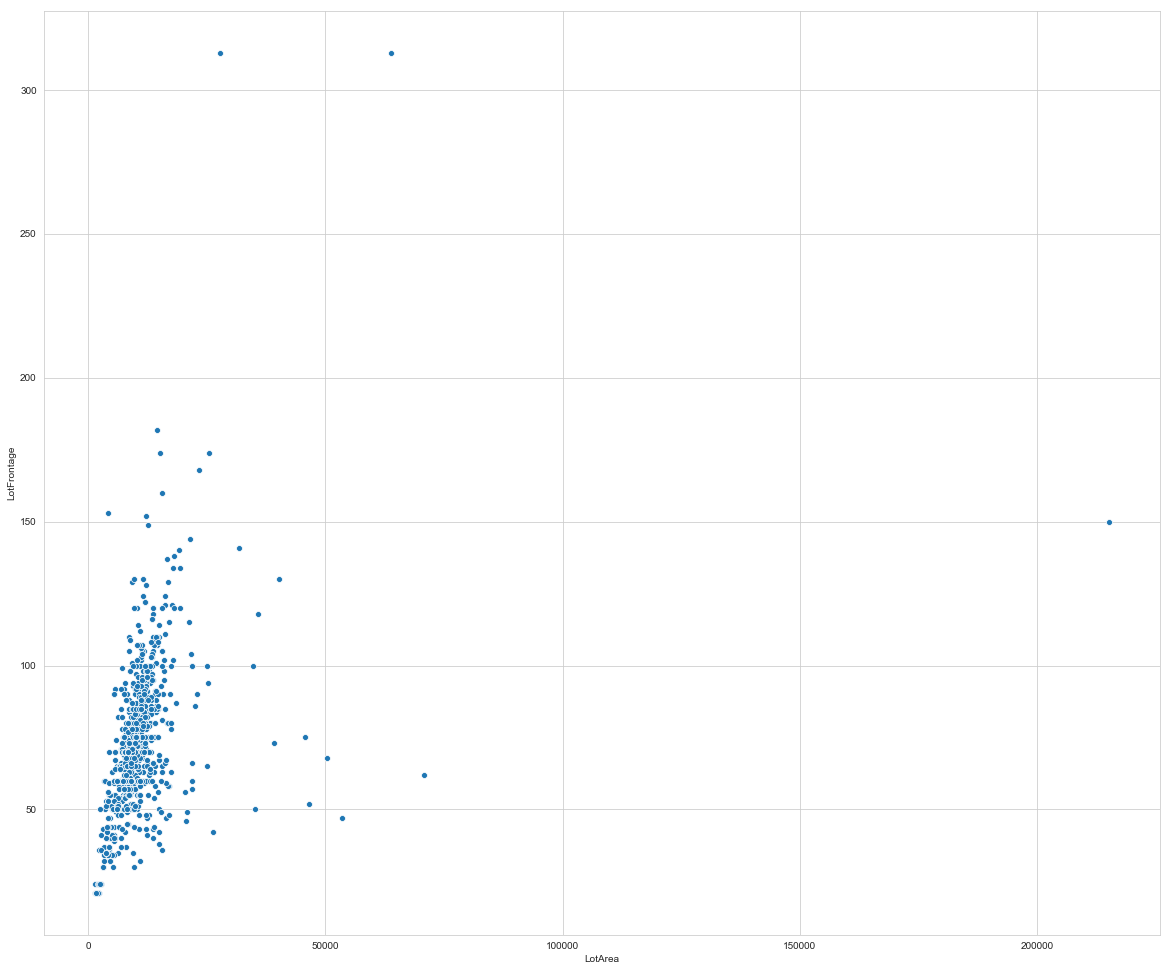

In [162]:
plt.figure(figsize=(20,17))
sns.scatterplot(x='LotArea',y='LotFrontage',data=df)

In [163]:
df[df['LotArea']>100000]['Neighborhood']

249    ClearCr
313     Timber
335     Timber
706    ClearCr
Name: Neighborhood, dtype: object

In [164]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [165]:
df[df['Neighborhood']=='NAmes']['LotFrontage'].describe()

count    186.000000
mean      76.462366
std       23.601905
min       34.000000
25%       69.000000
50%       73.000000
75%       80.000000
max      313.000000
Name: LotFrontage, dtype: float64

In [166]:
df[['LotFrontage','LotArea','Neighborhood']].groupby(by='Neighborhood').describe()

LotArea                                                         \
               count          mean           std     min       25%      50%   
Neighborhood                                                                  
Blmngtn         17.0   3398.176471    371.935014  3010.0   3182.00   3182.0   
Blueste          2.0   1625.000000    459.619408  1300.0   1462.50   1625.0   
BrDale          16.0   1801.000000    193.895848  1680.0   1680.00   1680.0   
BrkSide         58.0   7360.413793   2714.360899  4130.0   6000.00   6240.0   
ClearCr         28.0  30875.750000  34777.377591  2887.0  11114.50  17575.0   
CollgCr        150.0   9619.146667   2344.775545  4426.0   8467.50   9356.0   
Crawfor         51.0  11809.686275   5315.343377  3842.0   7573.00  11500.0   
Edwards        100.0  10218.650000   7026.897096  2522.0   8107.50   9091.0   
Gilbert         79.0  11379.151899   4679.548480  7415.0   8184.50   9967.0   
IDOTRR          37.0   8109.162162   2546.605426  3636.0   6780.00   7920.0   
MeadowV         17.0   2324.000000    955.922722  1477.0   1533.00   1974.0   
Mitchel         49.0  11624.285714   6025.812141  4500.0   8314.00   9947.0   
NAmes          225.0  10139.915556   3250.138758  4058.0   8294.00   9492.0   
NPkVill          9.0   3267.444444   1197.203837  2280.0   2289.00   2308.0   
NWAmes          73.0  11833.630137   2682.998610  8400.0  10140.00  11029.0   
NoRidge         41.0  14218.902439   7332.628883  9200.0  10437.00  12090.0   
NridgHt         77.0  10887.948052   3637.945957  2268.0   8769.00  11694.0   
OldTown        113.0   8207.061947   3235.479875  2500.0   5720.00   7800.0   
SWISU           25.0   8127.560000   2502.444739  4500.0   6292.00   7804.0   
Sawyer          74.0  10459.283784   3456.189015  6173.0   8247.00   9682.0   
SawyerW         59.0   9923.796610   2262.590869  7018.0   8245.50   9317.0   
Somerst         86.0   7840.872093   3742.981202  2117.0   4235.25   8640.0   
StoneBr         25.0  10671.920000   9892.293347  3696.0   5330.00   6820.0   
Timber          38.0  23664.236842  41074.756760  6853.0  10739.75  12781.5   
Veenker         11.0  15606.000000  11832.672851  9549.0  10184.00  11120.0   

                                 LotFrontage                              \
                   75%       max       count       mean        std   min   
Neighborhood                                                               
Blmngtn        3684.00    4045.0        14.0  47.142857   4.990100  43.0   
Blueste        1787.50    1950.0         2.0  24.000000   0.000000  24.0   
BrDale         1897.50    2368.0        16.0  21.562500   1.209339  21.0   
BrkSide        8337.75   21384.0        51.0  57.509804  15.528519  50.0   
ClearCr       37151.00  159000.0        13.0  83.461538  18.875096  62.0   
CollgCr       10889.75   16285.0       126.0  71.682540  16.359291  36.0   
Crawfor       14278.50   32668.0        41.0  71.804878  19.436074  40.0   
Edwards       10890.25   63887.0        92.0  68.217391  32.431780  24.0   
Gilbert       12309.00   34650.0        49.0  79.877551  32.748176  42.0   
IDOTRR         8765.00   18000.0        34.0  62.500000  18.282712  40.0   
MeadowV        2665.00    4224.0        15.0  27.800000  10.107988  21.0   
Mitchel       12508.00   32463.0        36.0  70.083333  22.100259  32.0   
NAmes         11029.00   31770.0       186.0  76.462366  23.601905  34.0   
NPkVill        4043.00    4928.0         7.0  32.285714  14.150551  24.0   
NWAmes        12243.00   20781.0        45.0  81.288889  10.614360  46.0   
NoRidge       14720.00   46589.0        33.0  91.878788  25.320147  52.0   
NridgHt       13478.00   20431.0        76.0  81.881579  24.991181  34.0   
OldTown       10410.00   22950.0       109.0  62.788991  18.170017  30.0   
SWISU          9638.00   15863.0        23.0  58.913043  10.539592  50.0   
Sawyer        11739.00   25339.0        48.0  74.437500  14.728618  40.0   
SawyerW       11223.00   16196.0        50.0  71.500

In [167]:
df["LotFrontage"] = df.groupby("Neighborhood")['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [168]:
df['LotFrontage'].nunique()

115

## null values all filled!

In [169]:
df.columns[df.isna().any()].tolist()

[]

## Outliers

### Documentation says

'There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students.'

So yeah, will do this

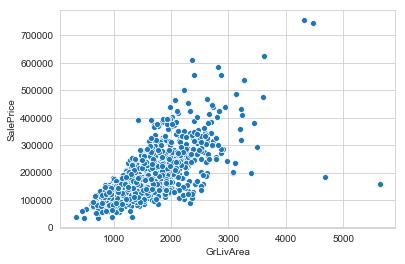

In [170]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df)

In [171]:
df[df['GrLivArea']>4000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,None,3,Bnk,AllPub,Inside,...,0,0,0,None,0,10,2007,New,Partial,184750
691,60,RL,104.0,21535,Pave,None,3,Lvl,AllPub,Corner,...,0,0,0,None,0,1,2007,WD,Normal,755000
1182,60,RL,160.0,15623,Pave,None,3,Lvl,AllPub,Corner,...,555,5,3,None,0,7,2007,WD,Abnorml,745000
1298,60,RL,313.0,63887,Pave,None,1,Bnk,AllPub,Corner,...,480,4,0,None,0,1,2008,New,Partial,160000


In [172]:
df.drop(index=[523,691,1182,1298],inplace=True)

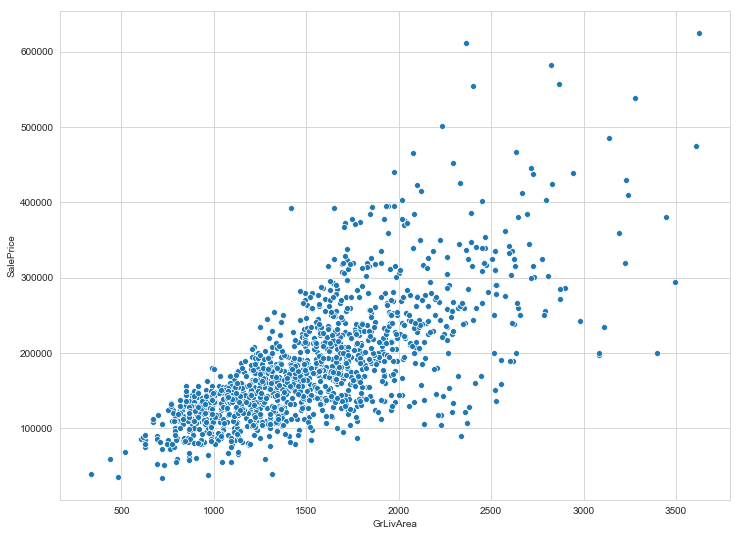

In [173]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df)

In [174]:
df[df['GrLivArea']<500]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
533,20,RL,50.0,5000,Pave,None,4,Low,AllPub,Inside,...,0,0,0,None,0,1,2007,WD,Normal,39300
916,20,C (all),50.0,9000,Pave,None,4,Lvl,AllPub,Inside,...,0,0,0,None,0,10,2006,WD,Abnorml,35311
1100,30,RL,60.0,8400,Pave,None,4,Bnk,AllPub,Inside,...,0,0,0,None,0,1,2009,WD,Normal,60000


/Users/analeegraig/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


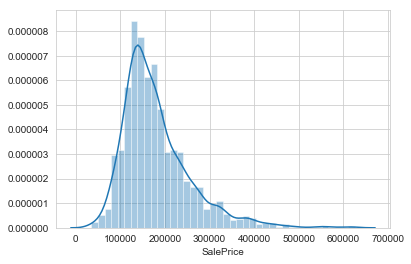

In [175]:
sns.distplot(df['SalePrice'])

### not gonna worry about normality for now. instead will run both regressions and see what they look like!

## Need to turn categorical variables into factors

In [176]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [177]:
df['CentralAir'].value_counts()

Y    1361
N      95
Name: CentralAir, dtype: int64

### Categorical variables:

    MSSubClass, MSZoning, Street, Alley, LandContour, LotCongif, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMat1, Exterior1, Exterior2, MasVnrType, Foundation, Heating, CentralAir, GarageType, MiscFeature, SaleType, SaleCondition

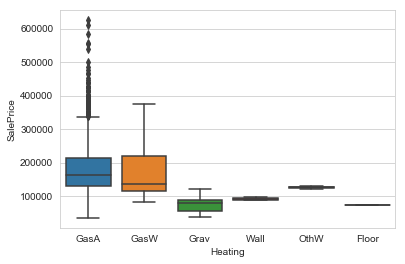

In [178]:
sns.boxplot(x='Heating',y='SalePrice',data=df)

# can come back to heating later. Would argue that this is an ordinal variable..maybe

In [179]:
# do central air separately

In [180]:
df['CentralAir'].value_counts()

Y    1361
N      95
Name: CentralAir, dtype: int64

In [181]:
df['CentralAir'] = df['CentralAir'].map({'Y':1, 'N':0})

In [182]:
df['MSSubClass'] = df['MSSubClass'].astype(str)

In [183]:
df = pd.get_dummies(data=df,columns=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'])

In [184]:
df.columns

Index(['LotFrontage', 'LotArea', 'LotShape', 'Utilities', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=234)

In [185]:
df

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,4,AllPub,3,7,5,2003,2003,196.0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,4,AllPub,3,6,8,1976,1976,0.0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,3,AllPub,3,7,5,2001,2002,162.0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,3,AllPub,3,7,5,1915,1970,0.0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,3,AllPub,3,8,5,2000,2000,350.0,...,0,0,0,1,0,0,0,0,1,0
5,85.0,14115,3,AllPub,3,5,5,1993,1995,0.0,...,0,0,0,1,0,0,0,0,1,0
6,75.0,10084,4,AllPub,3,8,5,2004,2005,186.0,...,0,0,0,1,0,0,0,0,1,0
7,80.0,10382,3,AllPub,3,7,6,1973,1973,240.0,...,0,0,0,1,0,0,0,0,1,0
8,51.0,6120,4,AllPub,3,7,5,1931,1950,0.0,...,0,0,0,1,1,0,0,0,0,0
9,50.0,7420,4,AllPub,3,5,6,1939,1950,0.0,...,0,0,0,1,0,0,0,0,1,0


In [186]:
df['Utilities'] = df['Utilities'].map({'AllPub':1, 'NoSeWa':0})

### utilities is something where you can maybe just get rid of the one without nosewage ... it is kind of an outlier...

In [187]:
df.dtypes.value_counts()

# okay, we r good

uint8      176
int64       55
float64      2
object       1
dtype: int64

In [188]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('uint8'): Index(['MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
        'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
        'MSSubClass_50', 'MSSubClass_60',
        ...
        'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
        'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
        'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
        'SaleCondition_Partial'],
       dtype='object', length=176),
 dtype('int64'): Index(['LotArea', 'LotShape', 'Utilities', 'LandSlope', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
        'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomA

In [189]:
df[df['GarageYrBlt'] != df['YearBuilt']].count().head(1)

LotFrontage    371
dtype: int64

In [190]:
# gonna drop garageyrblt ... its a stupid variable and i don't want to deal with it right now

In [191]:
df.drop(columns='GarageYrBlt',inplace=True)

In [192]:
df.dtypes.value_counts()

# okay cool, all the data remaining is numeric

uint8      176
int64       55
float64      2
dtype: int64

## Standardizing

In [193]:
from sklearn.preprocessing import StandardScaler

/Users/analeegraig/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/analeegraig/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [194]:
num_vars = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']

In [195]:
scaler = StandardScaler()

In [196]:
df[num_vars] = scaler.fit_transform(df[num_vars])

In [197]:
df[num_vars].describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,...,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03
mean,-1.638456e-16,7.157164e-17,-9.782887e-16,4.852269e-15,4.145036e-16,-1.312290e-16,-5.718869e-17,-6.519510e-17,5.410050e-17,-3.458009e-17,...,-1.352703e-16,-1.683635e-16,-5.753182e-17,1.584889e-16,4.790506e-16,9.458341e-16,-2.251328e-17,3.124409e-17,5.263843e-14,1.291321e-16
std,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,...,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00
min,-2.293113e+00,-9.281155e-01,-3.285242e+00,-1.686572e+00,-5.737566e-01,-1.016005e+00,-2.890821e-01,-1.282652e+00,-2.550055e+00,-2.229556e+00,...,-2.225287e+00,-7.497745e-01,-7.075030e-01,-3.598820e-01,-1.165011e-01,-5.811529e-02,-8.780911e-02,-1.974560e+00,-1.367490e+00,-1.894493e+00
25%,-4.645092e-01,-2.952139e-01,-5.692198e-01,-8.752398e-01,-5.737566e-01,-1.016005e+00,-2.890821e-01,-7.793101e-01,-6.205094e-01,-7.451870e-01,...,-6.704085e-01,-7.497745e-01,-7.075030e-01,-3.598820e-01,-1.165011e-01,-5.811529e-02,-8.780911e-02,-4.916667e-01,-6.150085e-01,-6.554202e-01
50%,4.363478e-03,-9.944678e-02,2.698005e-02,4.204704e-01,-5.737566e-01,-1.301793e-01,-2.890821e-01,-2.024462e-01,-1.460111e-01,-1.926118e-01,...,3.270823e-02,-7.497745e-01,-3.401372e-01,-3.598820e-01,-1.165011e-01,-5.811529e-02,-8.780911e-02,-1.209434e-01,1.374725e-01,-2.237013e-01
75%,4.732361e-01,1.155699e-01,9.544021e-01,9.290669e-01,3.488153e-01,6.266086e-01,-2.890821e-01,5.452147e-01,5.900073e-01,6.288022e-01,...,4.928014e-01,5.926216e-01,3.333668e-01,-3.598820e-01,-1.165011e-01,-5.811529e-02,-8.780911e-02,6.205033e-01,8.899535e-01,4.414850e-01
max,1.139797e+01,2.077593e+01,1.285624e+00,1.219693e+00,8.468296e+00,4.071098e+00,8.839724e+00,4.001874e+00,5.231231e+00,5.609428e+00,...,4.333989e+00,6.098044e+00,7.665376e+00,8.663968e+00,1.719363e+01,2.080607e+01,3.112263e+01,2.103397e+00,1.642435e+00,5.802104e+00


In [198]:
# df[num_vars] = df[num_vars].apply(lambda x: (x - x.mean()) / (x.std()))

In [199]:
# df.head()

### looks kind of weird?

In [200]:
# df[num_vars].describe()

#### ask about standardizing discrete variables, i did it for now, but am wondering

#### MoSold and #YrSold should really be categorical.... ?

## K-fold cross validation

In [201]:
from sklearn.model_selection import KFold

/Users/analeegraig/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [209]:
kfold = KFold(5, shuffle=True, random_state=1)

In [210]:
for train_index, test_index in kfold.split(df):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]
    y_train, y_test = df.iloc[train_index], df.iloc[test_index]

TRAIN: [   0    1    2 ... 1452 1454 1455] TEST: [   3   12   19   30   37   47   48   49   51   53   56   60   65   73
   75   80   81   87   88   91   94   98  101  104  107  108  111  115
  119  120  131  133  140  142  158  159  163  167  169  177  181  186
  190  194  198  201  204  223  231  236  248  255  258  259  264  267
  268  270  280  283  288  292  299  301  302  304  309  311  321  335
  341  348  368  375  382  383  386  399  401  403  408  409  418  422
  424  442  443  464  478  481  487  498  512  516  520  525  527  535
  537  538  546  547  556  571  573  575  579  581  584  587  593  596
  602  612  613  614  625  628  629  638  639  640  644  647  654  663
  671  674  675  680  685  697  703  707  709  711  713  719  724  725
  736  746  748  750  754  761  767  768  777  778  779  780  782  785
  798  804  810  813  825  826  827  831  833  834  845  846  858  861
  868  877  881  888  892  895  898  899  900  918  921  926  931  945
  952  957  977  983  985  9

### okay?

In [211]:
X_train

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.230073,-0.202770,4,1,3,7,5,1.053769,0.880629,0.533895,...,0,0,0,1,0,0,0,0,1,0
1,0.473236,-0.086107,4,1,3,6,8,0.159469,-0.427190,-0.573757,...,0,0,0,1,0,0,0,0,1,0
2,-0.089411,0.081281,3,1,3,7,5,0.987524,0.832191,0.341751,...,0,0,0,1,0,0,0,0,1,0
3,-0.464509,-0.091179,3,1,3,7,5,-1.860986,-0.717817,-0.573757,...,0,0,0,1,1,0,0,0,0,0
4,0.660785,0.386636,3,1,3,8,5,0.954402,0.735316,1.404192,...,0,0,0,1,0,0,0,0,1,0
5,0.707672,0.371926,3,1,3,5,5,0.722547,0.493127,-0.573757,...,0,0,0,1,0,0,0,0,1,0
6,0.238800,-0.037006,4,1,3,8,5,1.086891,0.977505,0.477382,...,0,0,0,1,0,0,0,0,1,0
7,0.473236,-0.006775,3,1,3,7,6,0.060102,-0.572504,0.782551,...,0,0,0,1,0,0,0,0,1,0
8,-0.886495,-0.439142,4,1,3,7,5,-1.331031,-1.686572,-0.573757,...,0,0,0,1,1,0,0,0,0,0
9,-0.933382,-0.307261,4,1,3,5,6,-1.066053,-1.686572,-0.573757,...,0,0,0,1,0,0,0,0,1,0
